# Pymaceuticals Inc.
---

### Analysis

- According to the following data, the following analysis can be made:
- The correlation coefficient displays positives attributes in data. Determining that the larger a mouse weighs, the larger the average tumor size. 
- Infubinol treatments had the largest tumor volumes on average and had the only outlier in the data. 
- Ramicane treatments had the best results in terms of average tumor size being the smallest at the end of the regimen. 
- The pie chart shows that there were slightly more male mice to female in the treatment regimens.
- Capomulin & Ramicane had the most mice in treatment than the other treatments.

 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice.
mice_count = mouse_study_complete["Mouse ID"].nunique()
mice_count

249

In [67]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mice = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989", :]
duplicates_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != "g989", :]
mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mouse_study_clean["Mouse ID"].nunique()
mice_count_clean

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).mean()
median = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).median()
var = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).var()
std = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).std()
sem = mouse_study_clean["Tumor Volume (mm3)"].groupby(mouse_study_clean["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                  "Median Tumor Volume": median,
                                  "Tumor Volume Variance": var,
                                  "Tumor Volume Std. Dev.": std,
                                  "Tumor Volume Std. Err.": sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_agg =  mouse_study_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

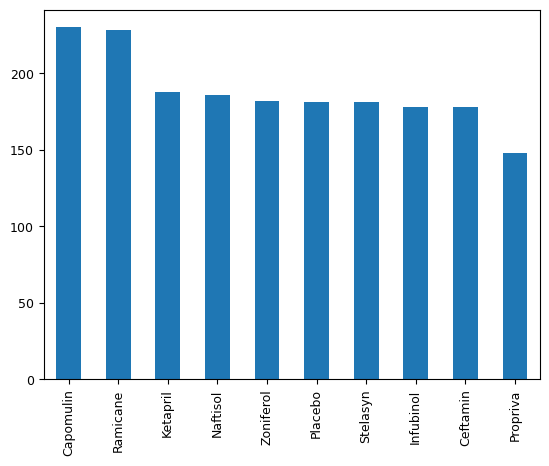

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar_plot = mouse_study_clean["Drug Regimen"].value_counts()
mice_plot = mice_bar_plot.plot.bar(x = "Drug Regimen", y = "Number of Mice", fontsize='9')

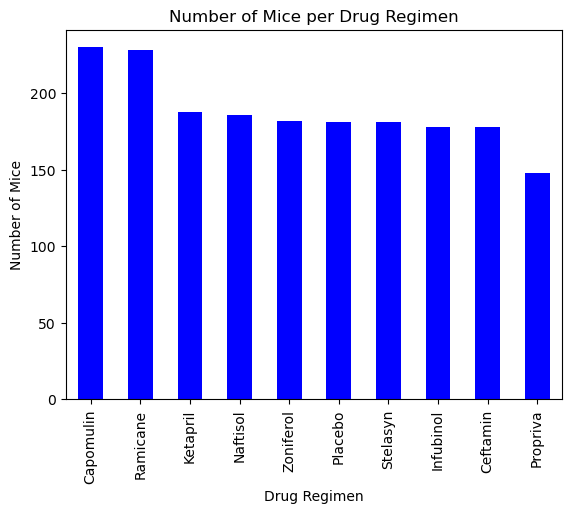

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.pandas = mice_bar_plot.plot.bar(color='b')
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

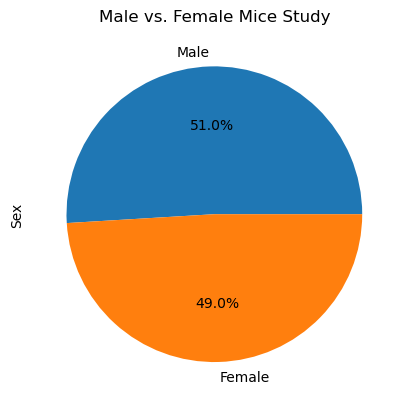

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie = mouse_study_clean["Sex"].value_counts()
plt.title("Male vs. Female Mice Study")
sex_pie.plot.pie(autopct= "%1.1f%%")
plt.show()

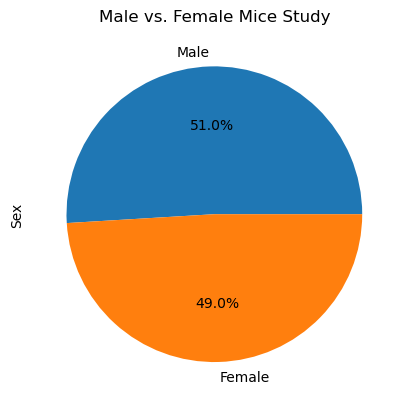

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [50.6, 49.4]
plot = sex_pie.plot.pie(y = "Total Count", autopct= "%1.1f%%")
plt.title("Male vs. Female Mice Study")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capmerge = pd.merge(Capomulin_vol, mouse_study_clean, on=("Mouse ID","Timepoint"),how="left")

rammerge = pd.merge(Ramicane_vol, mouse_study_clean, on=("Mouse ID","Timepoint"),how="left")

infmerge = pd.merge(Infubinol_vol, mouse_study_clean, on=("Mouse ID","Timepoint"),how="left")

cefmerge = pd.merge(Ceftamin_vol, mouse_study_clean, on=("Mouse ID","Timepoint"),how="left")

for regimen in regimen_list:
    print(regimen)

Capomulin
Ramicane
Infubinol
Ceftamin


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen = mouse_study_clean[mouse_study_clean["Drug Regimen"].isin(regimen_list)]
regimen.head()

tumors1 = capmerge["Tumor Volume (mm3)"]
tumors2 = rammerge["Tumor Volume (mm3)"]
tumors3 = infmerge["Tumor Volume (mm3)"]
tumors4 = cefmerge["Tumor Volume (mm3)"]

for regimen in regimen_list:
    quartiles1 = tumors1.quantile([.25,.5,.75]).round(2)
    lowerq1 = quartiles1[0.25].round(2)
    upperq1= quartiles1[0.75].round(2)
    iqr1 = round(upperq1-lowerq1,2)
    
    quartiles2= tumors2.quantile([.25,.5,.75]).round(2)
    lowerq2= quartiles2[0.25].round(2)
    upperq2= quartiles2[0.75].round(2)
    iqr2= round(upperq2-lowerq2,2)
    
    quartiles3= tumors3.quantile([.25,.5,.75]).round(2)
    lowerq3= quartiles3[0.25].round(2)
    upperq3= quartiles3[0.75].round(2)
    iqr3= round(upperq3-lowerq3,2)
    
    quartiles4= tumors4.quantile([.25,.5,.75]).round(2)
    lowerq4= quartiles4[0.25].round(2)
    upperq4= quartiles4[0.75].round(2)
    iqr4= round(upperq4-lowerq4,2)
    
    print(f"The lower quartile of Capomulin tumors: {lowerq1}")
    print(f"The upper quartile of Capomulin tumors: {upperq1}")
    print(f"The interquartile range of Capomulin tumors: {iqr1}")
    print(f"The median of Capomulin tumors: {quartiles1[0.5]} ")
    
    print(f"The lower quartile of Ramicane tumors: {lowerq2}")
    print(f"The upper quartile of Ramicane tumors: {upperq2}")
    print(f"The interquartile range of Ramicane tumors: {iqr2}")
    print(f"The median of Ramicane tumors: {quartiles2[0.5]} ")
 
    print(f"The lower quartile of Infubinol tumors: {lowerq3}")
    print(f"The upper quartile of Infubinol tumors: {upperq3}")
    print(f"The interquartile range of Infubinol tumors: {iqr3}")
    print(f"The median of Infubinol tumors: {quartiles3[0.5]} ")
    
    print(f"The lower quartile of Ceftamin tumors: {lowerq4}")
    print(f"The upper quartile of Ceftamin tumors: {upperq4}")
    print(f"The interquartile range of Ceftamin tumors: {iqr4}")
    print(f"The median of Ceftamin tumors: {quartiles4[0.5]} ")
    

# Create empty list to fill with tumor vol data (for plotting)
regimen_list_complete = [tumors1, tumors2, tumors3, tumors4]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lower_bound1 = round(lowerq1 - (1.5*iqr1),2)
upper_bound1 = round(upperq1 + (1.5*iqr1),2)

lower_bound2 = round(lowerq2 - (1.5*iqr2),2)
upper_bound2 = round(upperq2 + (1.5*iqr2),2) 

lower_bound3 = round(lowerq3 - (1.5*iqr3),2)
upper_bound3 = round(upperq3 + (1.5*iqr3),2) 

lower_bound4 = round(lowerq4 - (1.5*iqr4),2)
upper_bound4 = round(upperq4 + (1.5*iqr4),2) 

print(f"Values below {lower_bound1} could be outliers for Capomulin.")
print(f"Values above {upper_bound1} could be outliers for Capomulin.")

print(f"Values below {lower_bound2} could be outliers for Ramicane.")
print(f"Values above {upper_bound2} could be outliers for Ramicane.")

print(f"Values below {lower_bound3} could be outliers for Infubinol.")
print(f"Values above {upper_bound3} could be outliers for Infubinol.")

print(f"Values below {lower_bound4} could be outliers for Ceftamin.")
print(f"Values above {upper_bound4} could be outliers for Ceftamin.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


The lower quartile of Capomulin tumors: 32.38
The upper quartile of Capomulin tumors: 40.16
The interquartile range of Capomulin tumors: 7.78
The median of Capomulin tumors: 38.13 
The lower quartile of Ramicane tumors: 31.56
The upper quartile of Ramicane tumors: 40.66
The interquartile range of Ramicane tumors: 9.1
The median of Ramicane tumors: 36.56 
The lower quartile of Infubinol tumors: 54.05
The upper quartile of Infubinol tumors: 65.53
The interquartile range of Infubinol tumors: 11.48
The median of Infubinol tumors: 60.17 
The lower quartile of Ceftamin tumors: 48.72
The upper quartile of Ceftamin tumors: 64.3
The interquartile range of Ceftamin tumors: 15.58
The median of Ceftamin tumors: 59.85 
The lower quartile of Capomulin tumors: 32.38
The upper quartile of Capomulin tumors: 40.16
The interquartile range of Capomulin tumors: 7.78
The median of Capomulin tumors: 38.13 
The lower quartile of Ramicane tumors: 31.56
The upper quartile of Ramicane tumors: 40.66
The interquar

{'whiskers': [<matplotlib.lines.Line2D at 0x1f524c81fc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f524c81d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f524c80a60>,
 'medians': [<matplotlib.lines.Line2D at 0x1f524c805e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f524ce36a0>,
 'means': []}

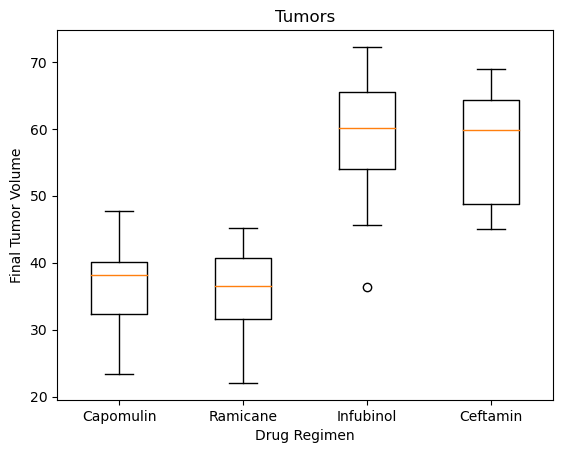

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumors1 = capmerge["Tumor Volume (mm3)"]
tumors2 = rammerge["Tumor Volume (mm3)"]
tumors3 = infmerge["Tumor Volume (mm3)"]
tumors4 = cefmerge["Tumor Volume (mm3)"]

boxplot = [tumors1, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(boxplot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

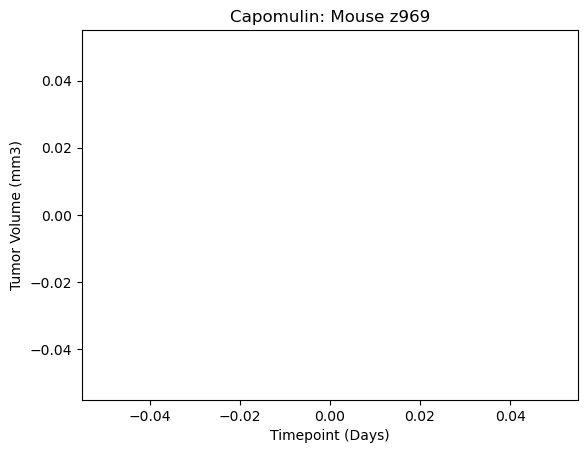

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_cap_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "z969",:]
line_cap_df.head()
x_axis = line_cap_df["Timepoint"]
tumsvol = line_cap_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin: Mouse z969')
plt.plot(x_axis, tumsvol, linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

C:\Users\lifeo\AppData\Local\Temp\ipykernel_18608\3533704085.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = Capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

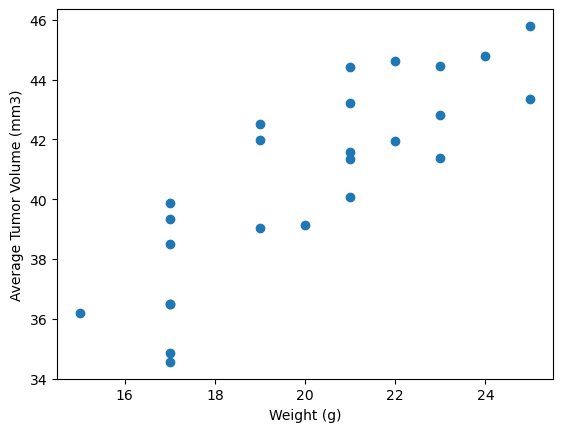

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capavg = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [82]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

Correlation Coefficient: 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

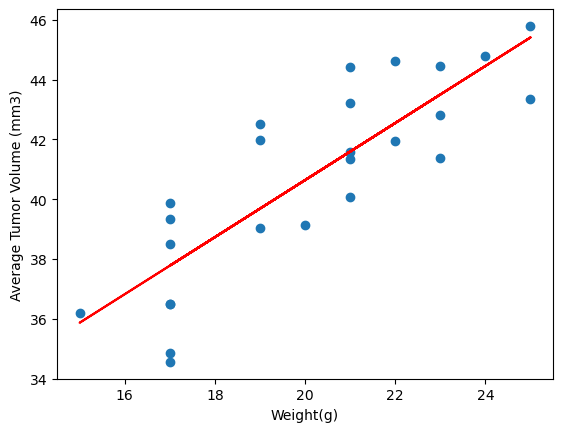

In [84]:
# Calculate the correlation coefficient and a linear regression model 
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"Correlation Coefficient: {corr}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
